In [1]:
import pandas as pd

# Load the uploaded CSV file to inspect its structure
file_path = '/content/Pizza.csv'
pizza_data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
pizza_data.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


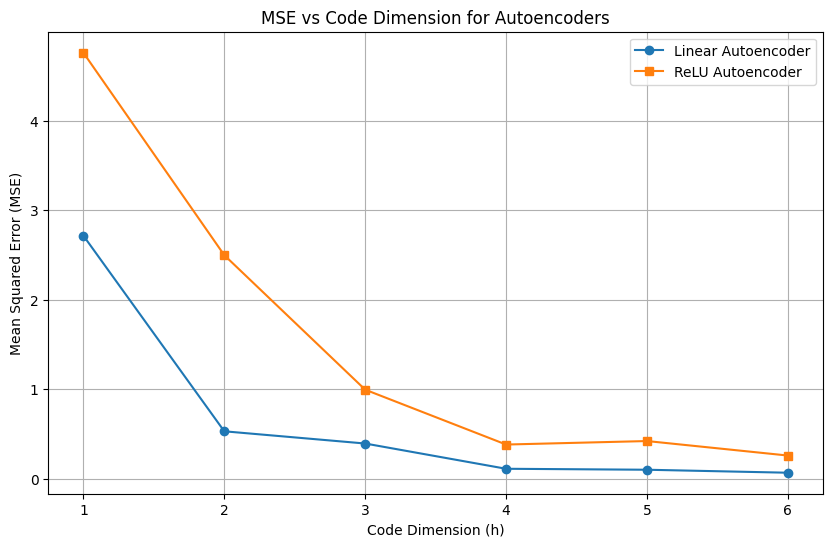

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

# Extract the relevant features (columns 3 through 9)
features = pizza_data.iloc[:, 2:].values

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test = train_test_split(features_scaled, test_size=0.2, random_state=42)

# Function to compute MSE using Frobenius norm
def compute_mse(X, X_reconstructed):
    return np.mean(np.square(np.linalg.norm(X - X_reconstructed, axis=1)))

# Initialize results storage
mse_linear = []
mse_relu = []
code_dimensions = range(1, 7)

# Linear Autoencoder and ReLU Autoencoder for varying dimensions of the code
for h in code_dimensions:
    # Define the linear autoencoder model
    input_dim = X_train.shape[1]
    linear_autoencoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(input_dim,)),
        tf.keras.layers.Dense(h, use_bias=False),  # Linear encoding
        tf.keras.layers.Dense(input_dim, use_bias=False)  # Linear decoding
    ])

    # Compile and train the linear autoencoder
    linear_autoencoder.compile(optimizer='adam', loss='mse')
    linear_autoencoder.fit(X_train, X_train, epochs=100, batch_size=16, verbose=0)

    # Reconstruct inputs and compute MSE for linear autoencoder
    X_reconstructed_linear = linear_autoencoder.predict(X_test)
    mse_linear.append(compute_mse(X_test, X_reconstructed_linear))

    # Define the ReLU autoencoder model
    relu_autoencoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(input_dim,)),
        tf.keras.layers.Dense(h, activation='relu'),  # ReLU encoding
        tf.keras.layers.Dense(input_dim)  # Linear decoding
    ])

    # Compile and train the ReLU autoencoder
    relu_autoencoder.compile(optimizer='adam', loss='mse')
    relu_autoencoder.fit(X_train, X_train, epochs=100, batch_size=16, verbose=0)

    # Reconstruct inputs and compute MSE for ReLU autoencoder
    X_reconstructed_relu = relu_autoencoder.predict(X_test)
    mse_relu.append(compute_mse(X_test, X_reconstructed_relu))

# Plot MSE as a function of code dimension
plt.figure(figsize=(10, 6))
plt.plot(code_dimensions, mse_linear, label='Linear Autoencoder', marker='o')
plt.plot(code_dimensions, mse_relu, label='ReLU Autoencoder', marker='s')
plt.xlabel('Code Dimension (h)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Code Dimension for Autoencoders')
plt.legend()
plt.grid()
plt.show()